In [10]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="x",
    database="ciencia_de_datos"
)
print(mydb)

In [6]:

mycursor = mydb.cursor()

In [ ]:
sql = "SELECT * FROM productos"
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Producto A', 'Descripción del Producto A', Decimal('10.00'), 100, datetime.datetime(2024, 12, 5, 19, 30, 7))
(2, 'Producto B', 'Descripción del Producto B', Decimal('15.50'), 50, datetime.datetime(2024, 12, 5, 19, 30, 7))
(3, 'Producto C', 'Descripción del Producto C', Decimal('20.75'), 150, datetime.datetime(2024, 12, 5, 19, 32, 55))
(4, 'Producto D', 'Descripción del Producto D', Decimal('5.00'), 200, datetime.datetime(2024, 12, 5, 19, 32, 55))
(5, 'Producto E', 'Descripción del Producto E', Decimal('12.99'), 80, datetime.datetime(2024, 12, 5, 19, 32, 55))
(6, 'Producto F', 'Descripción del Producto F', Decimal('7.50'), 300, datetime.datetime(2024, 12, 5, 19, 32, 55))
(7, 'Producto G', 'Descripción del Producto G', Decimal('25.00'), 120, datetime.datetime(2024, 12, 5, 19, 35, 22))
(8, 'Producto H', 'Descripción del Producto H', Decimal('30.00'), 50, datetime.datetime(2024, 12, 5, 19, 35, 22))
(9, 'Producto I', 'Descripción del Producto I', Decimal('18.50'), 60, datetime.datetime

In [11]:
sql = "SELECT nombre,stock FROM productos"
datos = pd.read_sql(sql,mydb)

/tmp/ipykernel_215427/513336099.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos = pd.read_sql(sql,mydb)


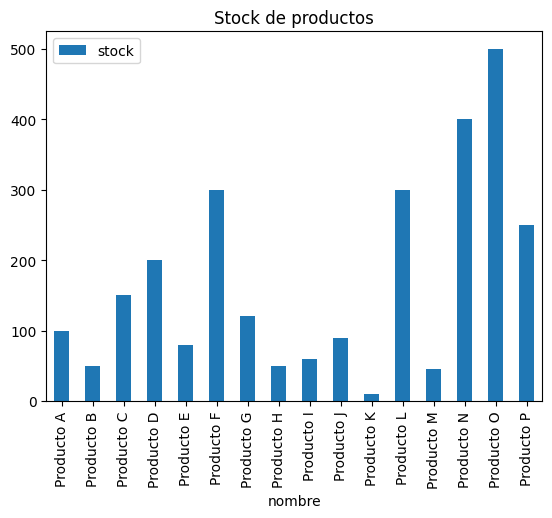

In [12]:
datos.plot(y = "stock",kind="bar",x="nombre")
plt.title("Stock de productos")
plt.show()

In [14]:
sql = "SELECT c.nombre AS cliente, p.id_pedido, MONTHNAME(p.fecha_pedido) AS mes, p.total FROM pedidos p JOIN clientes c ON p.id_cliente=c.id_cliente WHERE MONTH(p.fecha_pedido) IN(10,11,12) ORDER BY c.nombre,p.fecha_pedido"
consulta = pd.read_sql(sql,mydb)

/tmp/ipykernel_215427/3714704356.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  consulta = pd.read_sql(sql,mydb)



| cliente         | id_pedido | mes      | total  |
|-----------------|-----------|----------|--------|
| Ana Torres      |         4 | November | 150.00 |
| Ana Torres      |        15 | December | 110.75 |
| Carlos García   |         3 | November |  99.99 |
| Fernando Ortiz  |        10 | November | 300.00 |
| Juan Pérez      |         5 | October  |  30.00 |
| Juan Pérez      |        12 | November | 150.00 |
| Juan Pérez      |         1 | December |  30.00 |
| Luis Fernández  |         6 | December | 120.00 |
| María López     |         2 | October  |  45.50 |
| María López     |        13 | November | 250.50 |
| Ricardo Díaz    |         8 | October  |  75.00 |
| Sofía Reyes     |         9 | December | 180.00 |


Reacomodar la tabla para la visualizacion

In [16]:
pivot_consulta = consulta.pivot(index="cliente",columns="mes",values="total").fillna(0)

In [22]:
pivot_consulta

mes,December,November,October
cliente,,,
Ana Torres,110.75,150.00,0.0
Carlos García,0.00,99.99,0.0
Fernando Ortiz,0.00,300.00,0.0
Juan Pérez,30.00,150.00,30.0
Luis Fernández,120.00,0.00,0.0
María López,0.00,250.50,45.5
Ricardo Díaz,0.00,0.00,75.0
Sofía Reyes,180.00,0.00,0.0


Graficar la tabla

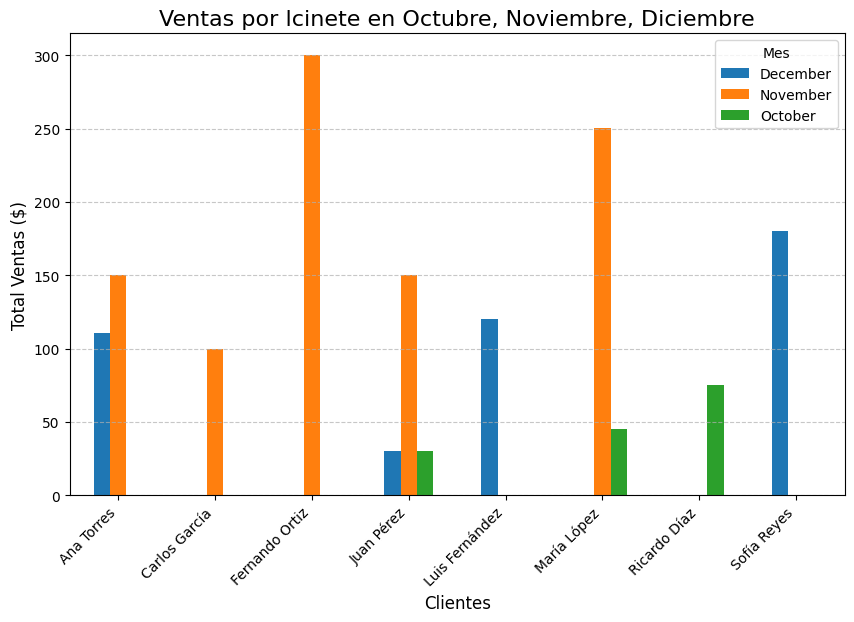

In [21]:
pivot_consulta.plot(kind="bar",figsize=(10,6))
plt.title("Ventas por lcinete en Octubre, Noviembre, Diciembre",fontsize=16)
plt.xlabel("Clientes",fontsize=12)
plt.ylabel("Total Ventas ($)",fontsize=12)
plt.xticks(rotation=45,ha="right",fontsize=10)
plt.legend(title="Mes",fontsize=10)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()